In [1]:
pip install pandas openpyxl

In [2]:
import pandas as pd

# Load the dataset
file_path = 'dataset.xlsx'  # Replace with the actual path if needed
data = pd.read_excel(file_path)

# Display the first 5 rows
print(data.head())

# Display the column names and data types
print("\nColumn Names and Data Types:")
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# Drop rows with missing 'Description'
data = data.dropna(subset=['Description'])

# Fill missing 'CustomerID' with a placeholder (-1)
data['CustomerID'] = data['CustomerID'].fillna(-1)

# Verify that there are no missing values left
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

Missing Values After Handling:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


<ipython-input-4-bc6d0f2eb675>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].fillna(-1)


In [5]:
# Check the number of rows remaining
print("Number of Rows After Handling Missing Values:", len(data))

# Check for missing values again
print("Missing Values After Handling:\n", data.isnull().sum())

Number of Rows After Handling Missing Values: 540455
Missing Values After Handling:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [6]:
# Summary statistics for numeric columns
numeric_columns = ['Quantity', 'UnitPrice']
summary_stats = data[numeric_columns].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
             Quantity      UnitPrice
count  540455.000000  540455.000000
mean        9.603129       4.623519
std       218.007598      96.889628
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


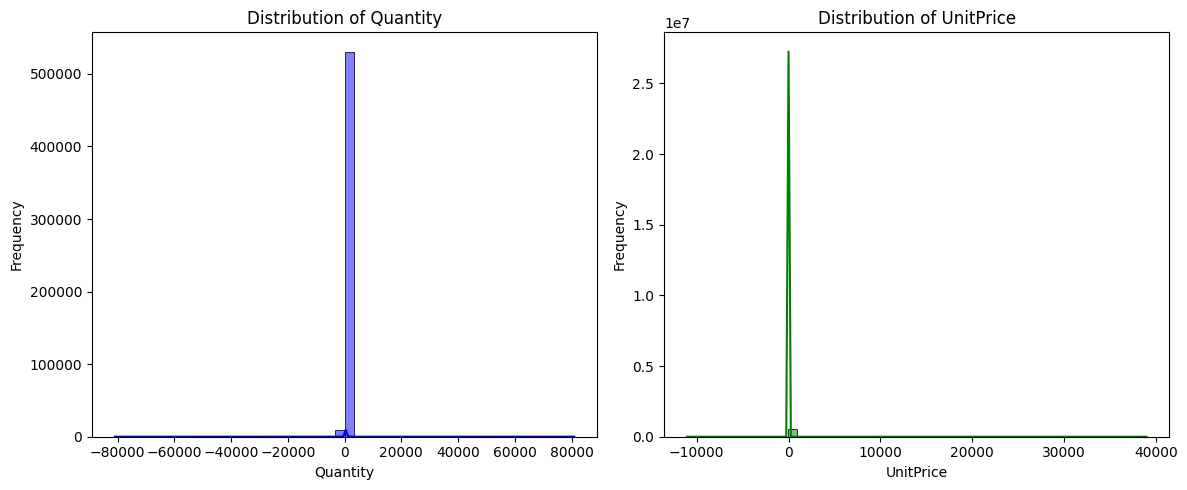

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms
sns.histplot(data['Quantity'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

sns.histplot(data['UnitPrice'], bins=50, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of UnitPrice')
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

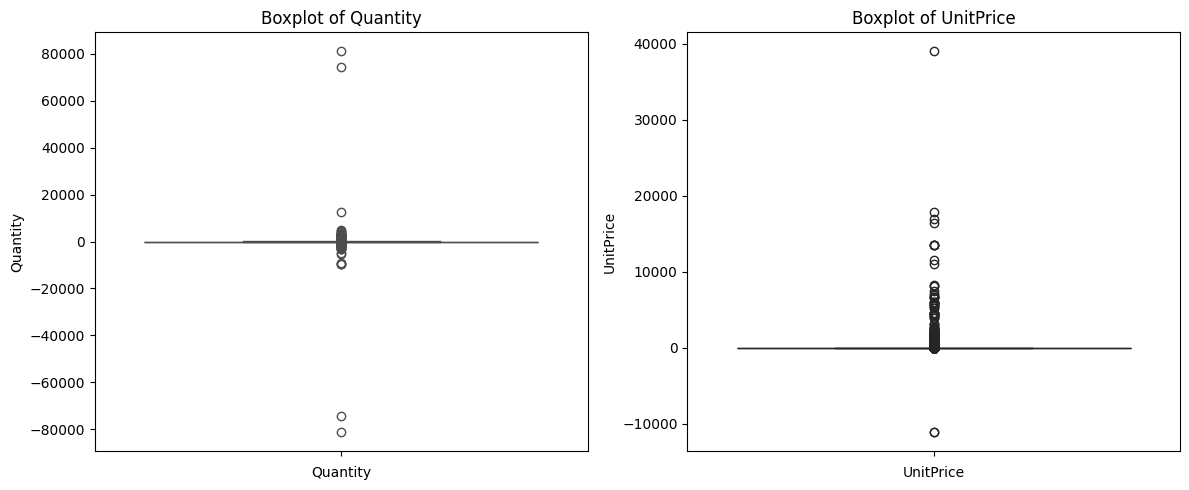

In [8]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot boxplots
sns.boxplot(data['Quantity'], ax=axes[0], color='blue')
axes[0].set_title('Boxplot of Quantity')
axes[0].set_xlabel('Quantity')

sns.boxplot(data['UnitPrice'], ax=axes[1], color='green')
axes[1].set_title('Boxplot of UnitPrice')
axes[1].set_xlabel('UnitPrice')

plt.tight_layout()
plt.show()

In [9]:
# Remove rows with invalid Quantity and UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [10]:
# Cap Quantity and UnitPrice at the 99th percentile
quantity_99th = data['Quantity'].quantile(0.99)
unitprice_99th = data['UnitPrice'].quantile(0.99)

data['Quantity'] = data['Quantity'].clip(upper=quantity_99th)
data['UnitPrice'] = data['UnitPrice'].clip(upper=unitprice_99th)

Summary Statistics After Cleaning:
             Quantity      UnitPrice
count  530104.000000  530104.000000
mean        8.779013       3.230608
std        15.267669       3.225169
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max       100.000000      16.980000


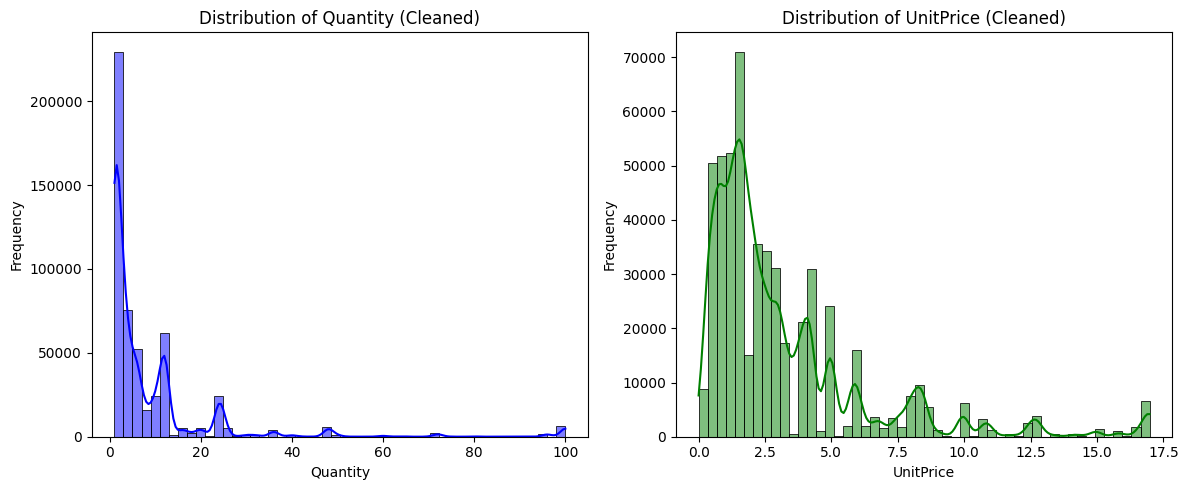

In [11]:
# Summary statistics after handling outliers
summary_stats_cleaned = data[numeric_columns].describe()
print("Summary Statistics After Cleaning:\n", summary_stats_cleaned)

# Visualize cleaned distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['Quantity'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Quantity (Cleaned)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

sns.histplot(data['UnitPrice'], bins=50, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of UnitPrice (Cleaned)')
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Create TotalAmount feature
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Verify the new feature
print(data[['Quantity', 'UnitPrice', 'TotalAmount']].head())

   Quantity  UnitPrice  TotalAmount
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


In [13]:
# Extract features from InvoiceDate
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()  # Day of the week
data['Month'] = data['InvoiceDate'].dt.month           # Month (1-12)
data['Hour'] = data['InvoiceDate'].dt.hour             # Hour (0-23)
data['DayOfMonth'] = data['InvoiceDate'].dt.day        # Day of the month (1-31)

# Verify the new features
print(data[['InvoiceDate', 'DayOfWeek', 'Month', 'Hour', 'DayOfMonth']].head())

          InvoiceDate  DayOfWeek  Month  Hour  DayOfMonth
0 2010-12-01 08:26:00  Wednesday     12     8           1
1 2010-12-01 08:26:00  Wednesday     12     8           1
2 2010-12-01 08:26:00  Wednesday     12     8           1
3 2010-12-01 08:26:00  Wednesday     12     8           1
4 2010-12-01 08:26:00  Wednesday     12     8           1


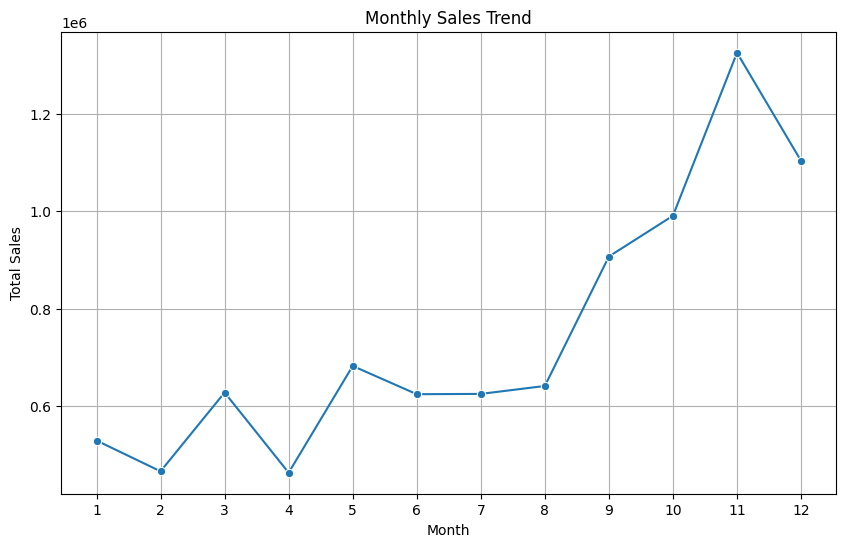

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and calculate total sales
monthly_sales = data.groupby('Month')['TotalAmount'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalAmount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.grid()
plt.show()

Top Customers by Total Spending:
       CustomerID  TotalPurchases  TotalAmount  AvgOrderValue
0           -1.0            1428   1432780.66      10.836338
1690     14646.0              73    212861.94     102.534653
4202     18102.0              60    133553.38     309.868631
1880     14911.0             201    132759.21      23.393693
1334     14156.0              55     93449.43      66.749593


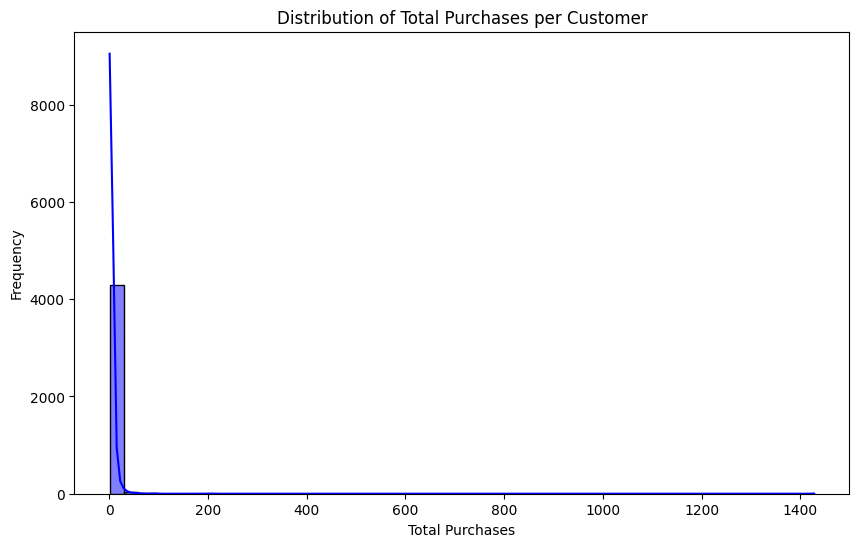

In [15]:
# Group by CustomerID and calculate metrics
customer_behavior = data.groupby('CustomerID').agg(
    TotalPurchases=('InvoiceNo', 'nunique'),  # Number of unique invoices
    TotalAmount=('TotalAmount', 'sum'),       # Total spending
    AvgOrderValue=('TotalAmount', 'mean')     # Average order value
).reset_index()

# Display top customers by total spending
print("Top Customers by Total Spending:\n", customer_behavior.sort_values(by='TotalAmount', ascending=False).head())

# Plot distribution of total purchases
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['TotalPurchases'], bins=50, kde=True, color='blue')
plt.title('Distribution of Total Purchases per Customer')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-b49e3d15a41f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalAmount', y='Country', data=sales_by_country, palette='viridis')


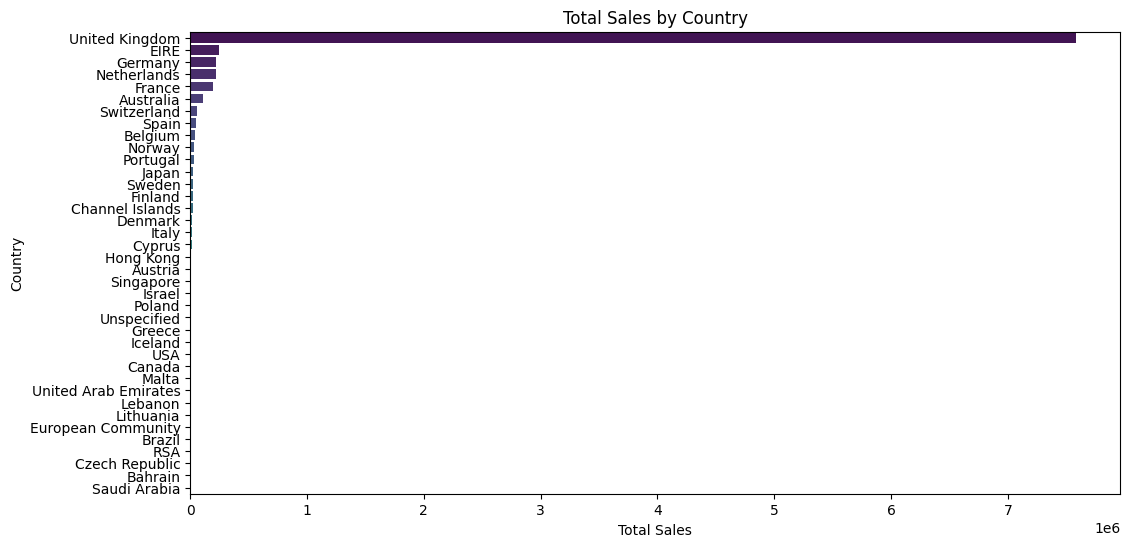

In [16]:
# Group by Country and calculate total sales
sales_by_country = data.groupby('Country')['TotalAmount'].sum().reset_index()

# Sort by total sales
sales_by_country = sales_by_country.sort_values(by='TotalAmount', ascending=False)

# Plot sales by country
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalAmount', y='Country', data=sales_by_country, palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

Top 10 Products by Sales:
                              Description  TotalAmount
2853            REGENCY CAKESTAND 3 TIER    159295.19
2413                       PARTY BUNTING     95922.05
3844  WHITE HANGING HEART T-LIGHT HOLDER     79904.73
1816             JUMBO BAG RED RETROSPOT     75607.80
2381     PAPER CHAIN KIT 50'S CHRISTMAS      52366.91
2692                             POSTAGE     52090.20
748                        CHILLI LIGHTS     47576.12
227        ASSORTED COLOUR BIRD ORNAMENT     47506.65
2741                  RABBIT NIGHT LIGHT     41723.40
3462                      SPOTTY BUNTING     40489.73


<ipython-input-17-4a0dbe0025c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalAmount', y='Description', data=sales_by_product.head(10), palette='magma')


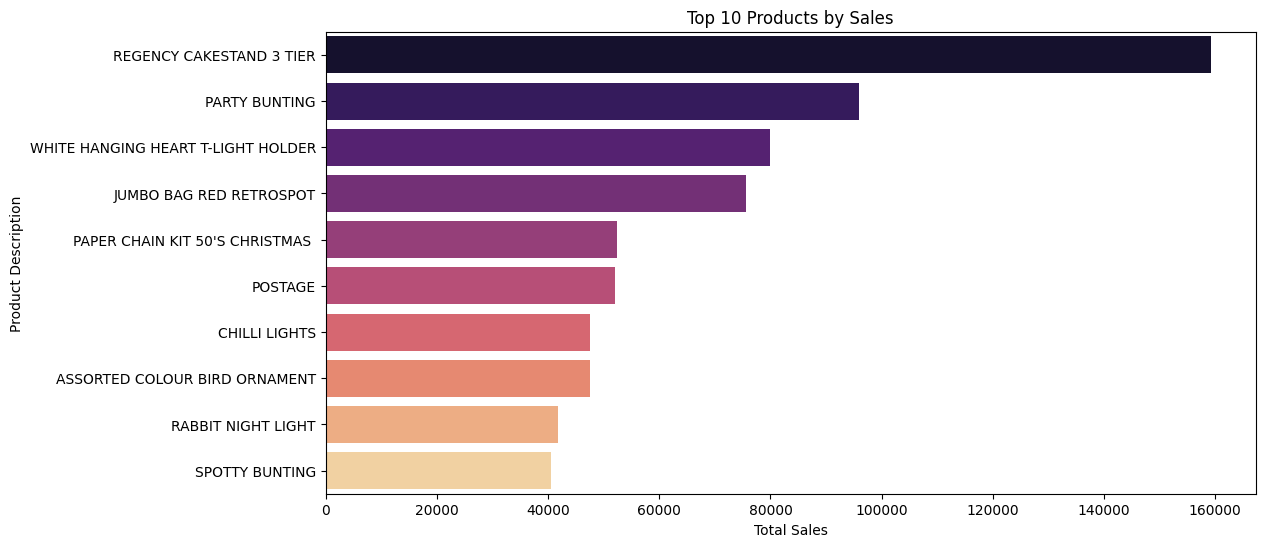

In [17]:
# Group by Description (product name) and calculate total sales
sales_by_product = data.groupby('Description')['TotalAmount'].sum().reset_index()

# Sort by total sales
sales_by_product = sales_by_product.sort_values(by='TotalAmount', ascending=False)

# Display top 10 products by sales
print("Top 10 Products by Sales:\n", sales_by_product.head(10))

# Plot top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalAmount', y='Description', data=sales_by_product.head(10), palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

In [18]:
# Filter data for UK customers
data_uk = data[data['Country'] == 'United Kingdom']

In [19]:
# Drop rows with missing CustomerID
data_uk = data_uk[data_uk['CustomerID'].notna()]

In [20]:
# Remove cancelled transactions
data_uk = data_uk[(data_uk['Quantity'] > 0) & (data_uk['UnitPrice'] > 0)]

In [21]:
from datetime import datetime

# Calculate Recency (days since last purchase)
data_uk['InvoiceDate'] = pd.to_datetime(data_uk['InvoiceDate'])
snapshot_date = data_uk['InvoiceDate'].max() + pd.Timedelta(days=1)  # Latest date in the dataset + 1 day

# Aggregate data at customer level
customer_data = data_uk.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum',    # Monetary Value
    'Quantity': 'sum',       # Total Quantity
}).reset_index()

# Rename columns
customer_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'MonetaryValue',
    'Quantity': 'TotalQuantity'
}, inplace=True)

# Calculate Average Order Value (AOV)
customer_data['AOV'] = customer_data['MonetaryValue'] / customer_data['Frequency']

In [22]:
# Cap outliers for MonetaryValue and Frequency
monetary_cap = customer_data['MonetaryValue'].quantile(0.95)
frequency_cap = customer_data['Frequency'].quantile(0.95)

customer_data['MonetaryValue'] = customer_data['MonetaryValue'].clip(upper=monetary_cap)
customer_data['Frequency'] = customer_data['Frequency'].clip(upper=frequency_cap)

In [23]:
# Calculate Customer Tenure
customer_tenure = data_uk.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()
customer_tenure['Tenure'] = (customer_tenure['max'] - customer_tenure['min']).dt.days

# Merge Tenure with customer_data
customer_data = customer_data.merge(customer_tenure[['CustomerID', 'Tenure']], on='CustomerID', how='left')

# Calculate Purchase Frequency (average time between purchases)
customer_data['PurchaseFrequency'] = customer_data['Tenure'] / customer_data['Frequency']

In [24]:
customer_data['CLV'] = customer_data['AOV'] * customer_data['Frequency'] * customer_data['Tenure']

In [25]:
print(customer_data.describe())

         CustomerID      Recency    Frequency  MonetaryValue  TotalQuantity  \
count   3921.000000  3921.000000  3921.000000    3921.000000    3921.000000   
mean   15558.090538    92.185157     3.616679    1180.300361     990.180311   
std     1595.866182    99.531817     3.368933    1349.508893    6578.258772   
min       -1.000000     1.000000     1.000000       3.750000       1.000000   
25%    14208.000000    18.000000     1.000000     283.280000     150.000000   
50%    15569.000000    51.000000     2.000000     626.650000     354.000000   
75%    16913.000000   143.000000     5.000000    1510.800000     892.000000   
max    18287.000000   374.000000    13.000000    5126.760000  387562.000000   

               AOV       Tenure  PurchaseFrequency           CLV  
count  3921.000000  3921.000000        3921.000000  3.921000e+03  
mean    324.000275   131.082632          31.125388  3.017413e+05  
std     257.600097   132.310455          35.131935  6.995116e+05  
min       3.450000  

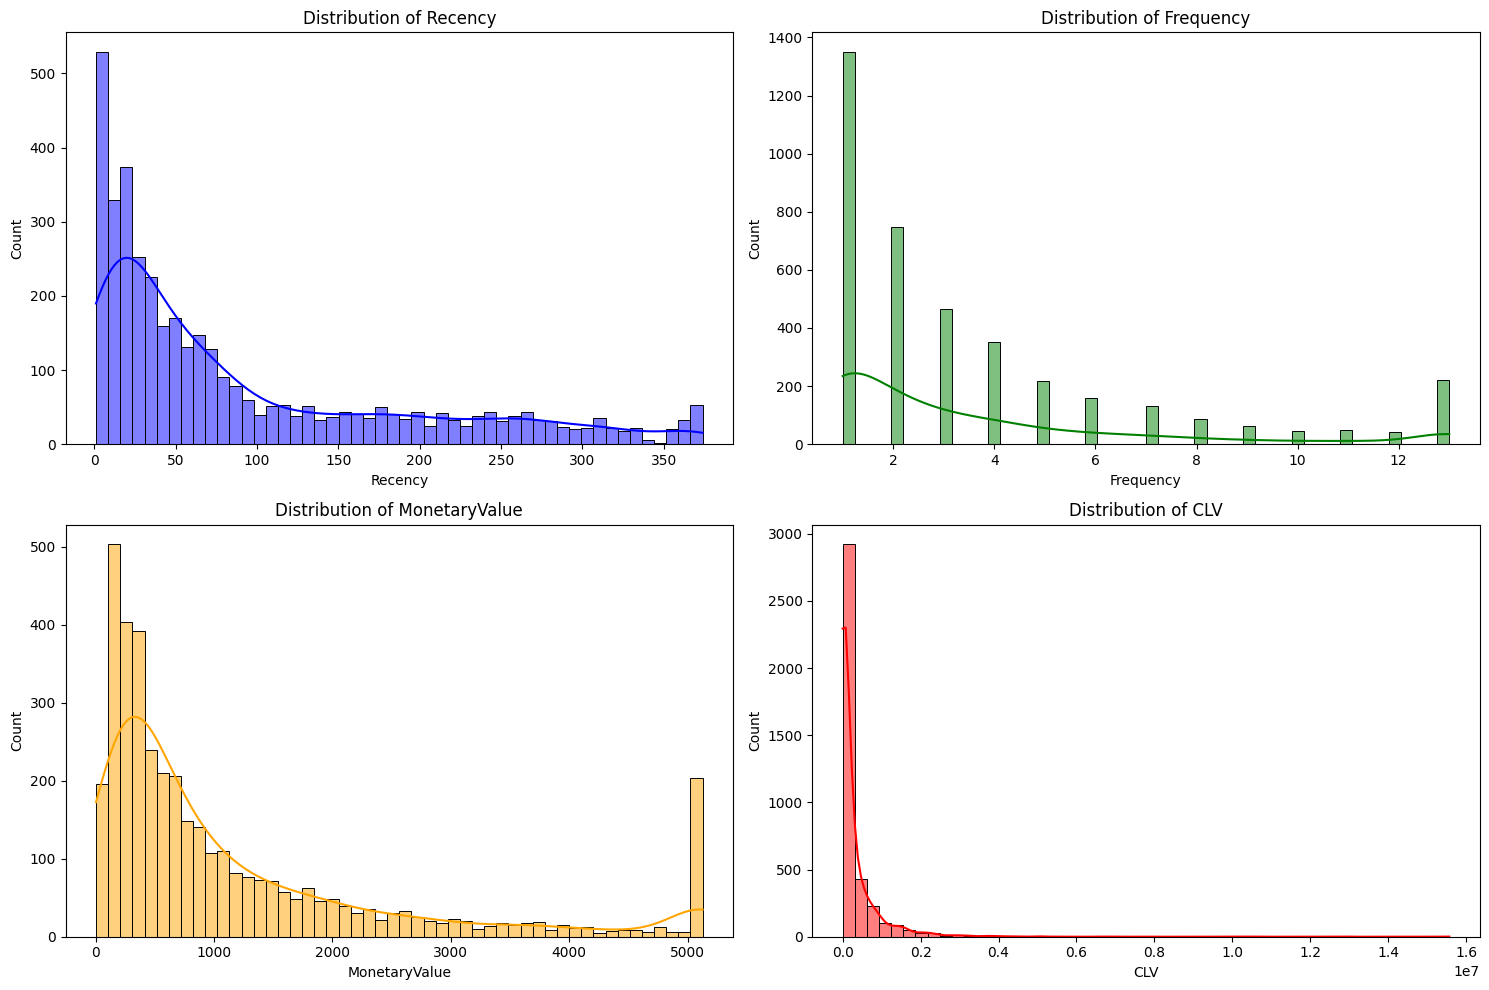

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(customer_data['Recency'], bins=50, kde=True, color='blue')
plt.title('Distribution of Recency')

plt.subplot(2, 2, 2)
sns.histplot(customer_data['Frequency'], bins=50, kde=True, color='green')
plt.title('Distribution of Frequency')

plt.subplot(2, 2, 3)
sns.histplot(customer_data['MonetaryValue'], bins=50, kde=True, color='orange')
plt.title('Distribution of MonetaryValue')

plt.subplot(2, 2, 4)
sns.histplot(customer_data['CLV'], bins=50, kde=True, color='red')
plt.title('Distribution of CLV')

plt.tight_layout()
plt.show()

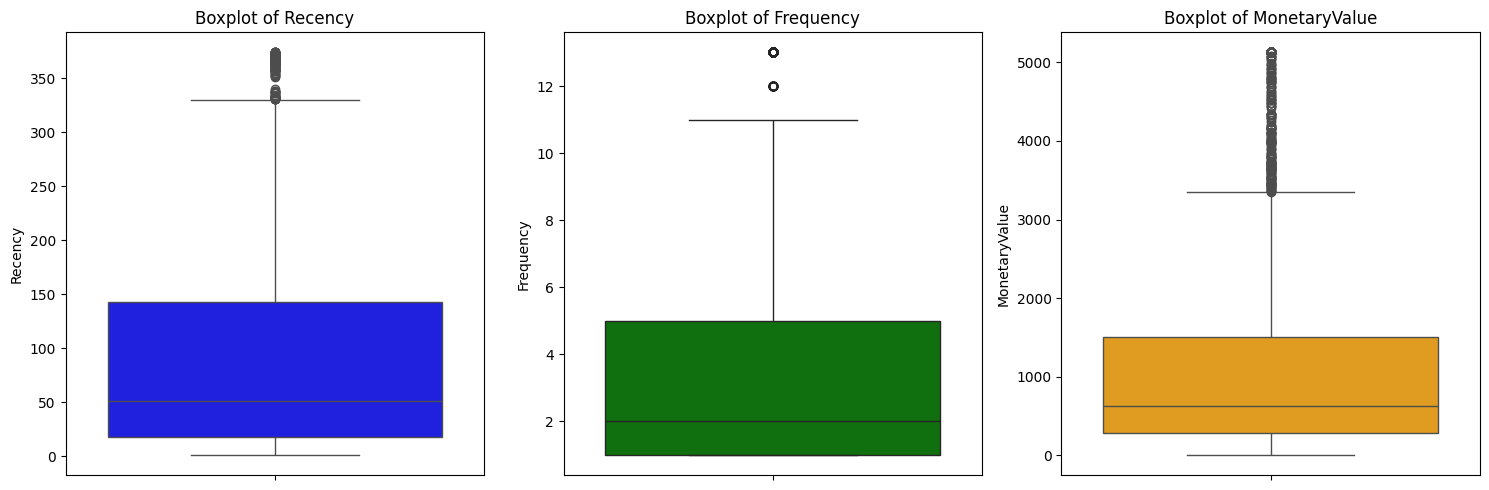

In [27]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(customer_data['Recency'], color='blue')
plt.title('Boxplot of Recency')

plt.subplot(1, 3, 2)
sns.boxplot(customer_data['Frequency'], color='green')
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(customer_data['MonetaryValue'], color='orange')
plt.title('Boxplot of MonetaryValue')

plt.tight_layout()
plt.show()

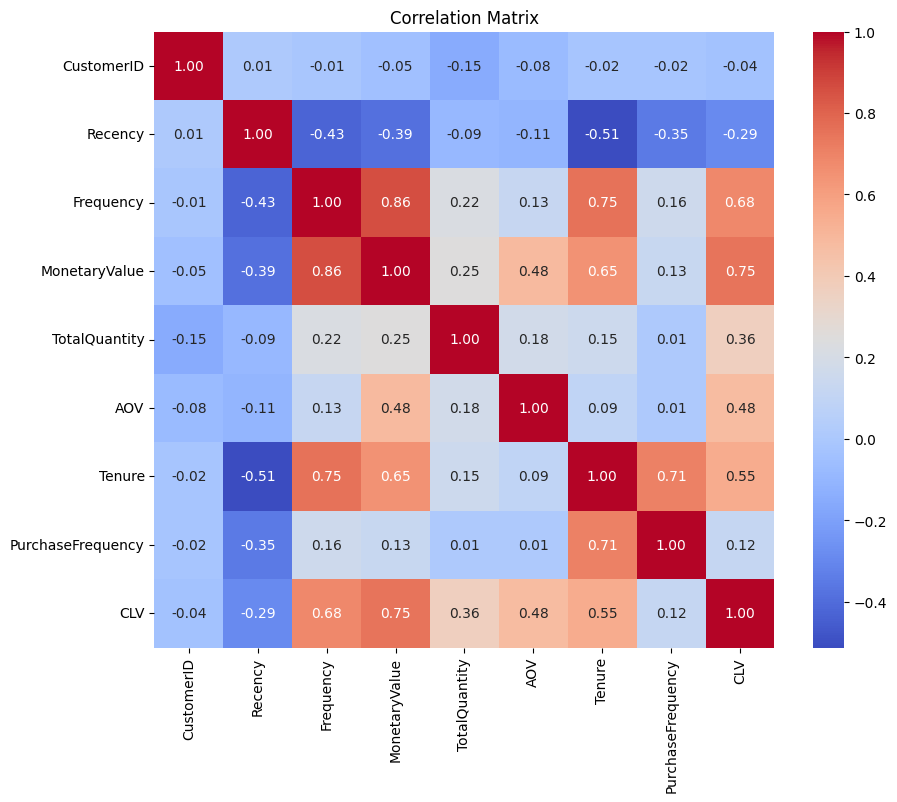

In [28]:
# Correlation matrix
corr_matrix = customer_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

CLV Summary:
 count    3.921000e+03
mean     3.017413e+05
std      6.995116e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.431426e+04
75%      3.200535e+05
max      1.556719e+07
Name: CLV, dtype: float64


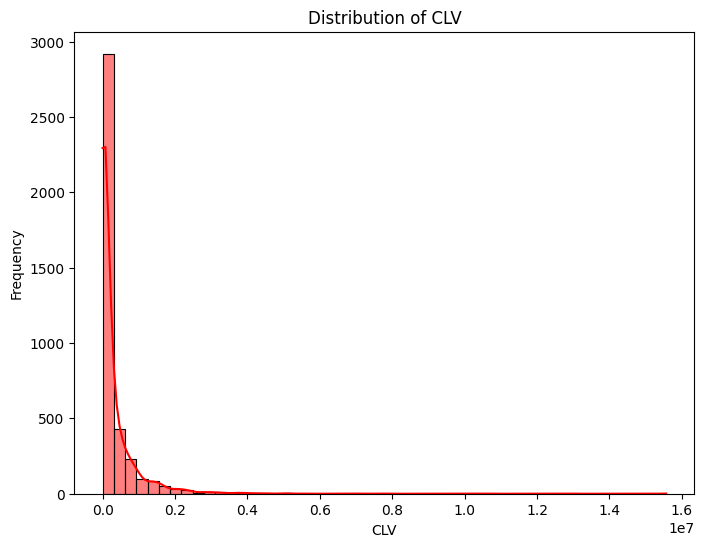

In [29]:
# Summary statistics for CLV
print("CLV Summary:\n", customer_data['CLV'].describe())

# Plot CLV distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['CLV'], bins=50, kde=True, color='red')
plt.title('Distribution of CLV')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Display first few rows
print(customer_data.head())

   CustomerID  Recency  Frequency  MonetaryValue  TotalQuantity          AOV  \
0        -1.0        1         13        5126.76         387562  1022.596475   
1     12346.0      326          1         104.00            100   104.000000   
2     12747.0        2         11        4196.01           1275   381.455455   
3     12748.0        1         13        5126.76          23565   149.931388   
4     12749.0        4          5        4057.86           1471   811.572000   

   Tenure  PurchaseFrequency           CLV  
0     372          28.615385  4.945277e+06  
1       0           0.000000  0.000000e+00  
2     366          33.272727  1.535740e+06  
3     372          28.615385  7.250682e+05  
4     209          41.800000  8.480927e+05  


In [31]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = customer_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure']]
y = customer_data['CLV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 168491.54605975075
Root Mean Squared Error (RMSE): 563290.8848100196
R-squared (R²): 0.5255858774961334


In [40]:
# Cap CLV at the 95th percentile
clv_cap = customer_data['CLV'].quantile(0.95)
customer_data['CLV'] = customer_data['CLV'].clip(upper=clv_cap)

# Verify the changes
print("CLV Summary After Capping:\n", customer_data['CLV'].describe())

CLV Summary After Capping:
 count    3.921000e+03
mean     2.474204e+05
std      3.885959e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.431426e+04
75%      3.200535e+05
max      1.400052e+06
Name: CLV, dtype: float64


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Select features to scale
features_to_scale = ['Recency', 'Frequency', 'MonetaryValue', 'Tenure', 'PurchaseFrequency']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
customer_data[features_to_scale] = scaler.fit_transform(customer_data[features_to_scale])

# Verify the scaled features
print(customer_data[features_to_scale].head())

    Recency  Frequency  MonetaryValue    Tenure  PurchaseFrequency
0  0.000000   1.000000       1.000000  0.997319           0.156797
1  0.871314   0.000000       0.019569  0.000000           0.000000
2  0.002681   0.833333       0.818320  0.981233           0.182316
3  0.000000   1.000000       1.000000  0.997319           0.156797
4  0.008043   0.333333       0.791353  0.560322           0.229041


In [44]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = customer_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure', 'PurchaseFrequency']]
y = customer_data['CLV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3136, 5) (3136,)
Testing set shape: (785, 5) (785,)


In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=3, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [46]:
# Initialize the XGBoost model with best parameters (if tuning was performed)
xgb_model = XGBRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R²:", r2_xgb)

XGBoost MAE: 21409.516823146805
XGBoost RMSE: 74104.99711964524
XGBoost R²: 0.9658661737017826


In [48]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, scoring='r2', cv=5)
print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R²:", cv_scores.mean())

Cross-Validation R² Scores: [0.97270025 0.9758389  0.99093113 0.98415896 0.97173157]
Mean Cross-Validation R²: 0.9790721625463537


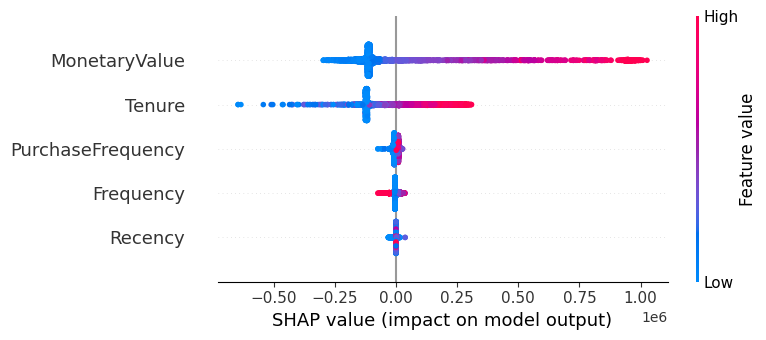

In [49]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'MonetaryValue': X_test['MonetaryValue'],  # Use the original (unscaled) values if needed
    'Actual_CLV': y_test,
    'Predicted_CLV': y_pred
})

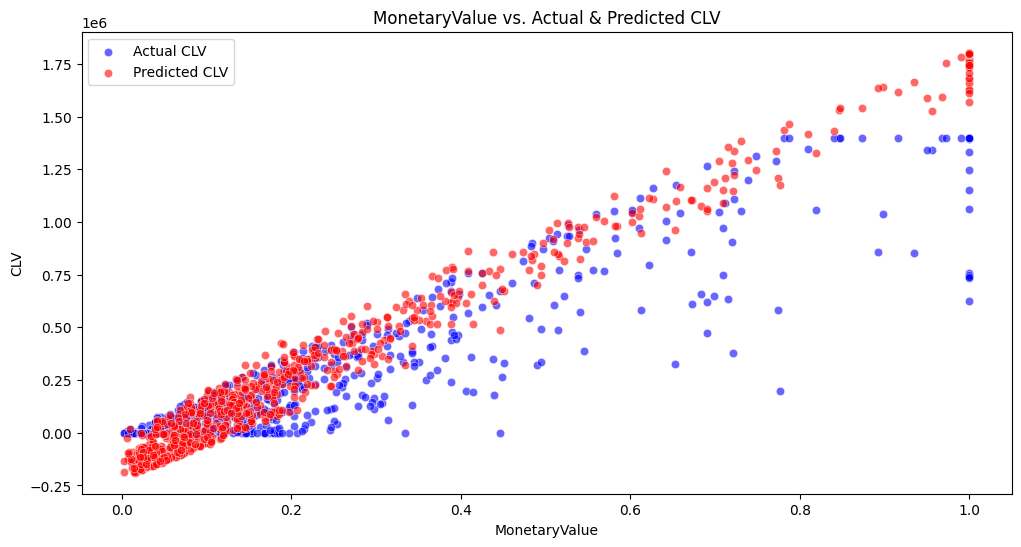

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MonetaryValue', y='Actual_CLV', data=results_df, color='blue', label='Actual CLV', alpha=0.6)
sns.scatterplot(x='MonetaryValue', y='Predicted_CLV', data=results_df, color='red', label='Predicted CLV', alpha=0.6)
plt.xlabel('MonetaryValue')
plt.ylabel('CLV')
plt.title('MonetaryValue vs. Actual & Predicted CLV')
plt.legend()
plt.show()

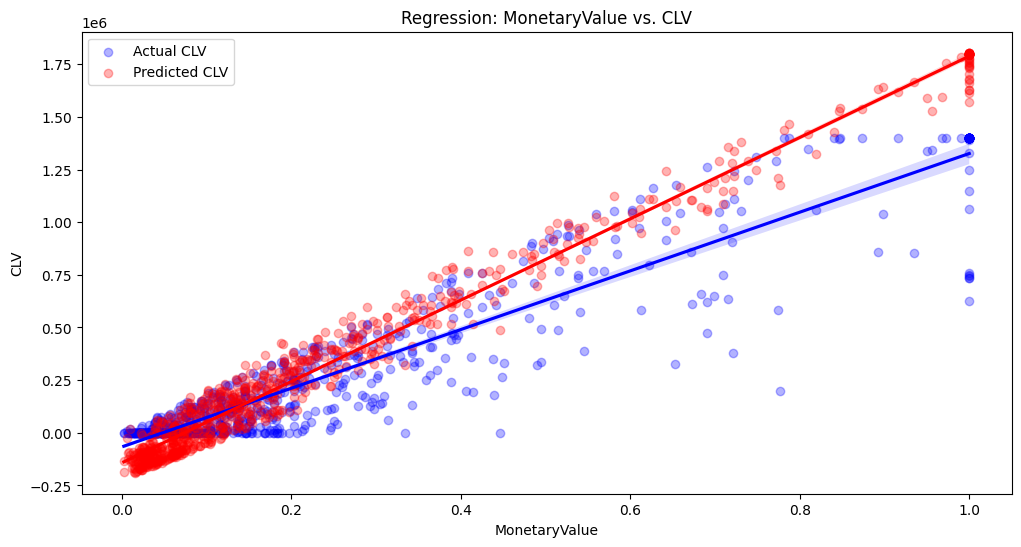

In [52]:
plt.figure(figsize=(12, 6))
sns.regplot(x='MonetaryValue', y='Actual_CLV', data=results_df, color='blue', label='Actual CLV', scatter_kws={'alpha':0.3})
sns.regplot(x='MonetaryValue', y='Predicted_CLV', data=results_df, color='red', label='Predicted CLV', scatter_kws={'alpha':0.3})
plt.xlabel('MonetaryValue')
plt.ylabel('CLV')
plt.title('Regression: MonetaryValue vs. CLV')
plt.legend()
plt.show()

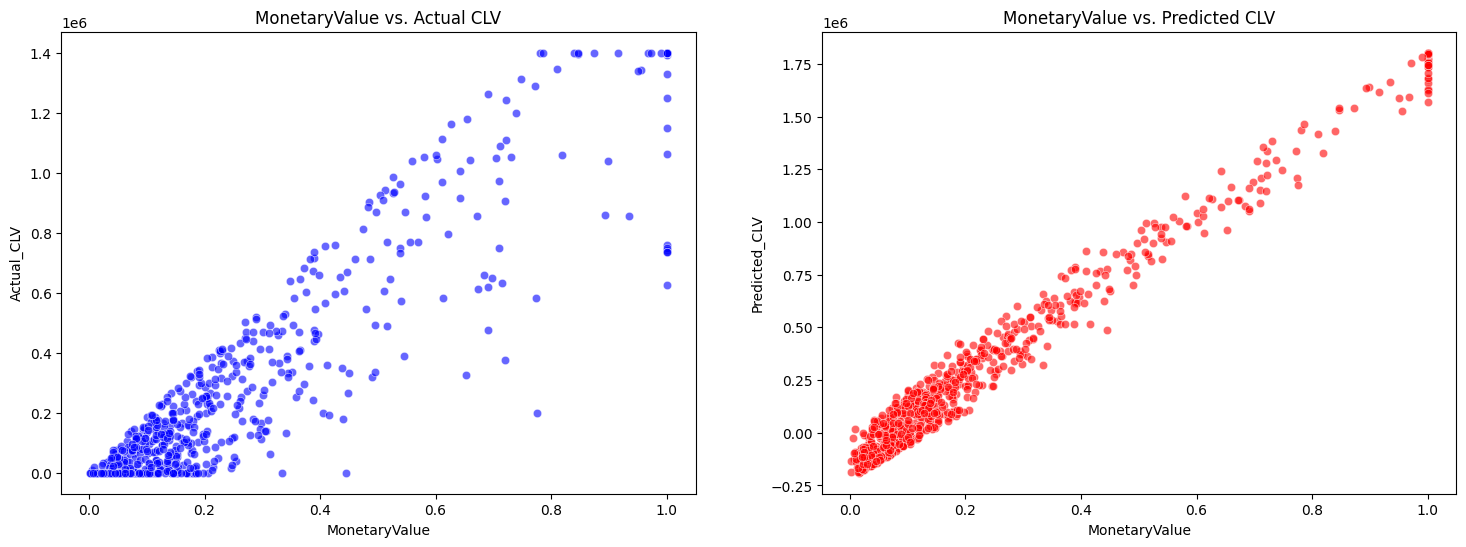

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Actual CLV
sns.scatterplot(x='MonetaryValue', y='Actual_CLV', data=results_df, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('MonetaryValue vs. Actual CLV')

# Predicted CLV
sns.scatterplot(x='MonetaryValue', y='Predicted_CLV', data=results_df, ax=axes[1], color='red', alpha=0.6)
axes[1].set_title('MonetaryValue vs. Predicted CLV')

plt.show()

In [55]:
# Add predicted CLV to the dataset
customer_data['CLV_Predicted'] = xgb_model.predict(X)

# Define the threshold (e.g., 75th percentile)
clv_threshold = customer_data['CLV_Predicted'].quantile(0.75)

# Create the binary target variable
customer_data['HighValue'] = (customer_data['CLV_Predicted'] > clv_threshold).astype(int)

# Display the distribution of high-value vs. low-value customers
print("High-Value Customers:", customer_data['HighValue'].sum())
print("Low-Value Customers:", len(customer_data) - customer_data['HighValue'].sum())

High-Value Customers: 980
Low-Value Customers: 2941


In [56]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X_class = customer_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure', 'PurchaseFrequency']]
y_class = customer_data['HighValue']

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Verify the splits
print("Training set shape:", X_train_class.shape, y_train_class.shape)
print("Testing set shape:", X_test_class.shape, y_test_class.shape)

Training set shape: (3136, 5) (3136,)
Testing set shape: (785, 5) (785,)


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred_class = rf_model.predict(X_test_class)

# Generate classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       576
           1       0.99      0.99      0.99       209

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785

Confusion Matrix:
 [[573   3]
 [  3 206]]


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'MonetaryValue': X_test_class['MonetaryValue'],
    'Actual_HighValue': y_test_class,
    'Predicted_HighValue': y_pred_class
})

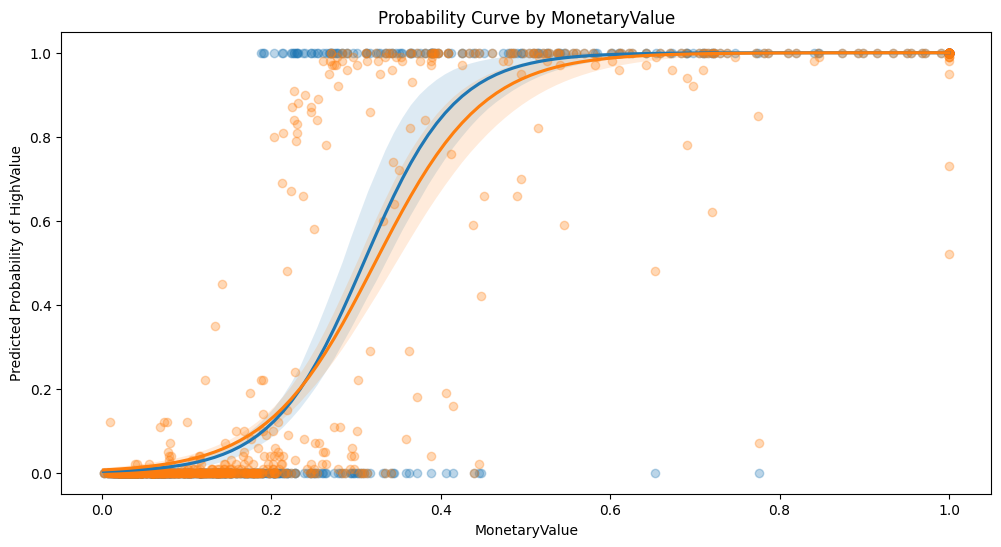

In [70]:
# Get predicted probabilities instead of binary predictions
y_proba = rf_model.predict_proba(X_test_class)[:, 1]
plot_data['Predicted_Probability'] = y_proba

# Plot probability curve
plt.figure(figsize=(12, 6))
sns.regplot(x='MonetaryValue', y='Actual_HighValue', data=plot_data,
            logistic=True, scatter_kws={'alpha':0.3})
sns.regplot(x='MonetaryValue', y='Predicted_Probability', data=plot_data,
            logistic=True, scatter_kws={'alpha':0.3})
plt.xlabel('MonetaryValue')
plt.ylabel('Predicted Probability of HighValue')
plt.title('Probability Curve by MonetaryValue')
plt.show()

Data sample:
      MonetaryValue  Actual_HighValue  Predicted_Probability
803        0.062309                 0                    0.0
1204       0.033305                 0                    0.0
3733       0.013615                 0                    0.0
3483       0.057458                 0                    0.0
1739       0.076125                 0                    0.0


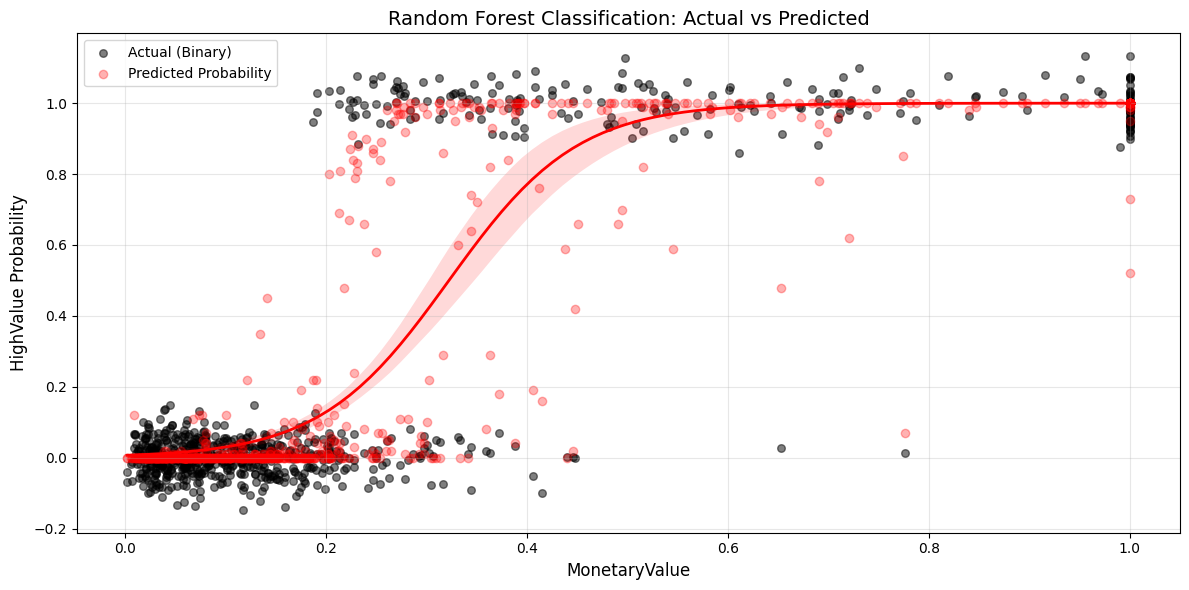

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. First verify your data
print("Data sample:")
print(plot_data[['MonetaryValue', 'Actual_HighValue', 'Predicted_Probability']].head())

# 2. Create a clean figure with proper sizing
plt.figure(figsize=(12, 6), dpi=100)  # Clear any existing figures

# 3. Plot actual binary values with jitter
y_jitter = plot_data['Actual_HighValue'] + np.random.normal(0, 0.05, size=len(plot_data))
plt.scatter(plot_data['MonetaryValue'], y_jitter,
            c='black', alpha=0.5, s=30, label='Actual (Binary)')

# 4. Plot predicted probabilities
sns.regplot(x='MonetaryValue', y='Predicted_Probability', data=plot_data,
            logistic=True, scatter_kws={'alpha':0.3, 'color':'red'},
            line_kws={'color':'red', 'lw':2}, label='Predicted Probability')

# 5. Add proper labels and formatting
plt.xlabel('MonetaryValue', fontsize=12)
plt.ylabel('HighValue Probability', fontsize=12)
plt.title('Random Forest Classification: Actual vs Predicted', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 6. Ensure proper display
plt.tight_layout()
plt.show()

In [72]:
# Add predicted high/low value labels to the dataset
customer_data['Predicted_HighValue'] = rf_model.predict(X_class)

# Segment customers
high_value_customers = customer_data[customer_data['Predicted_HighValue'] == 1]
low_value_customers = customer_data[customer_data['Predicted_HighValue'] == 0]

# Display segment sizes
print("High-Value Customers:", len(high_value_customers))
print("Low-Value Customers:", len(low_value_customers))

High-Value Customers: 980
Low-Value Customers: 2941


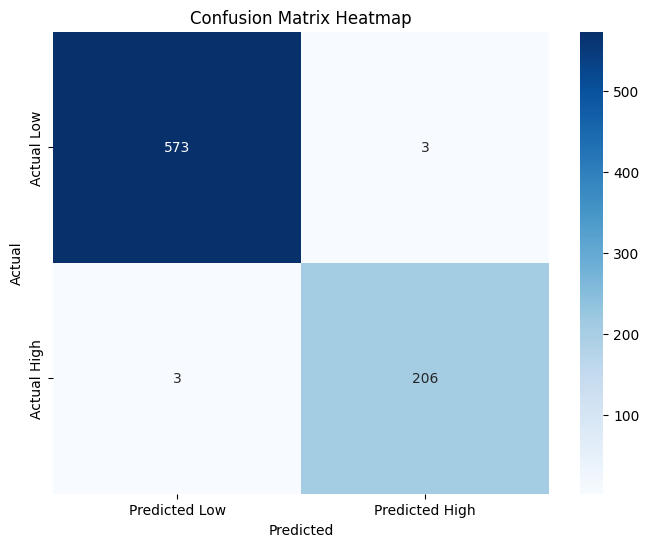

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

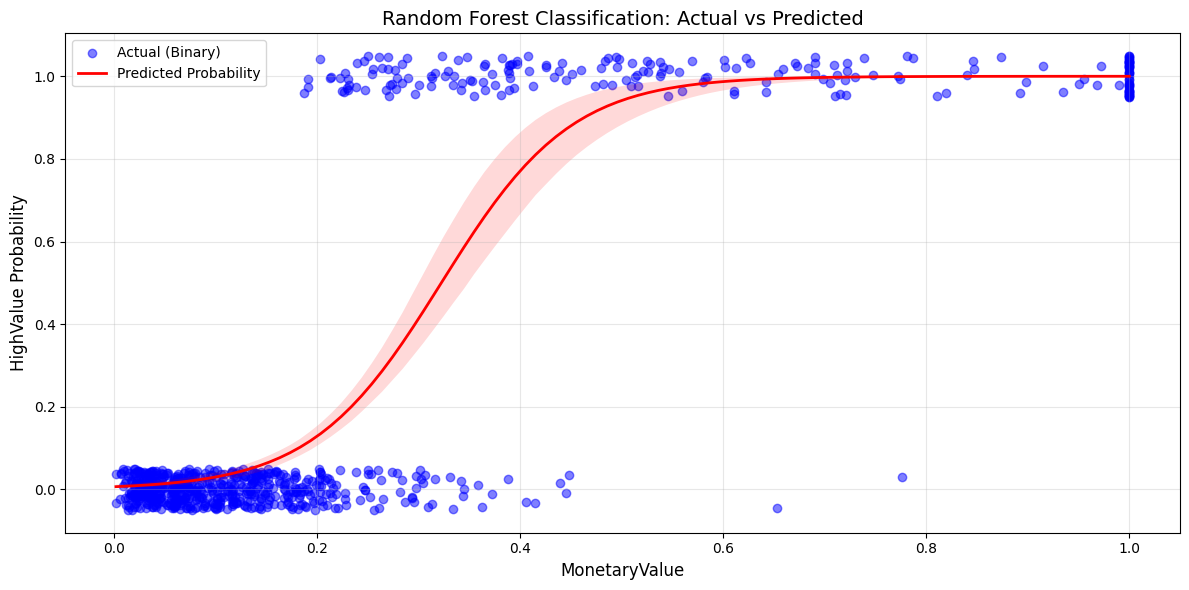

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Prepare the plot
plt.figure(figsize=(12, 6))

# 2. Add actual binary values with jitter
jitter_amount = 0.05
y_jittered = y_test_class + np.random.uniform(-jitter_amount, jitter_amount, size=len(y_test_class))
plt.scatter(X_test_class['MonetaryValue'], y_jittered,
            alpha=0.5, color='blue', label='Actual (Binary)')

# 3. Add predicted probabilities
y_proba = rf_model.predict_proba(X_test_class)[:, 1]
sns.regplot(x=X_test_class['MonetaryValue'], y=y_proba,
            logistic=True, scatter=False,
            line_kws={'color':'red', 'lw':2},
            label='Predicted Probability')

# 4. Add formatting
plt.xlabel('MonetaryValue', fontsize=12)
plt.ylabel('HighValue Probability', fontsize=12)
plt.title('Random Forest Classification: Actual vs Predicted', fontsize=14)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# 5. Show plot
plt.tight_layout()
plt.show()

In [75]:
# Select features for clustering
X_cluster = customer_data[['Recency', 'Frequency', 'MonetaryValue', 'Tenure', 'PurchaseFrequency']]

# Scale the features (KNN is sensitive to feature scales)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

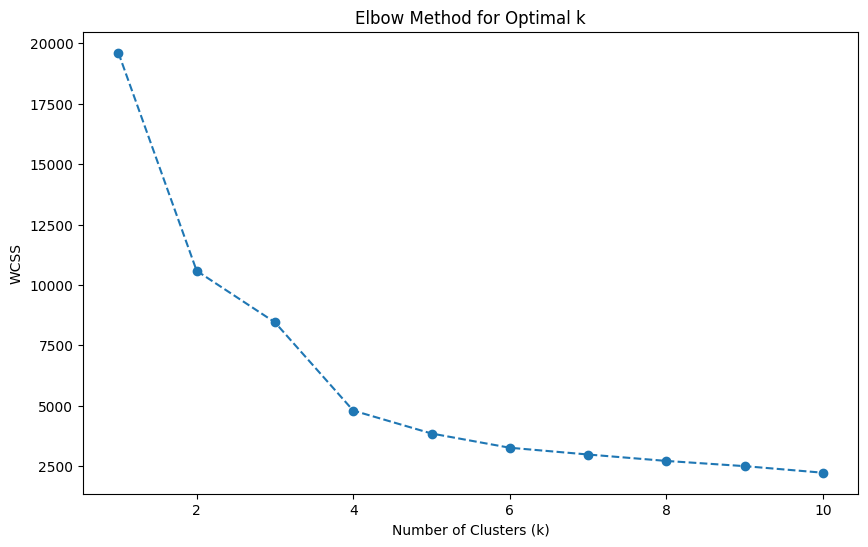

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the Within-Cluster-Sum-of-Squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [80]:
from sklearn.neighbors import NearestNeighbors

# Initialize KNN
knn = NearestNeighbors(n_neighbors=5)  # Adjust n_neighbors as needed

# Fit the model
knn.fit(X_cluster_scaled)

# Find the nearest neighbors for each customer
distances, indices = knn.kneighbors(X_cluster_scaled)

# Add cluster labels to the dataset
customer_data['Cluster'] = knn.kneighbors(X_cluster_scaled, return_distance=False)[:, 0]  # Example: Use the first neighbor as the cluster label

In [84]:
cluster_summary = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': 'mean',
    'PurchaseFrequency': 'mean',
    'CLV_Predicted': 'mean'
}).round(2)

print(cluster_summary)

         Recency  Frequency  MonetaryValue  Tenure  PurchaseFrequency  \
Cluster                                                                 
1           0.87       0.00           0.02    0.00               0.00   
2           0.00       0.83           0.82    0.98               0.18   
3           0.00       1.00           1.00    1.00               0.16   
4           0.01       0.33           0.79    0.56               0.23   
5           0.01       0.25           0.18    0.87               0.44   
...          ...        ...            ...     ...                ...   
3916        0.74       0.00           0.03    0.00               0.00   
3917        0.48       0.00           0.02    0.00               0.00   
3918        0.02       0.08           0.03    0.32               0.32   
3919        0.01       1.00           0.41    0.89               0.14   
3920        0.11       0.17           0.36    0.42               0.29   

         CLV_Predicted  
Cluster                 


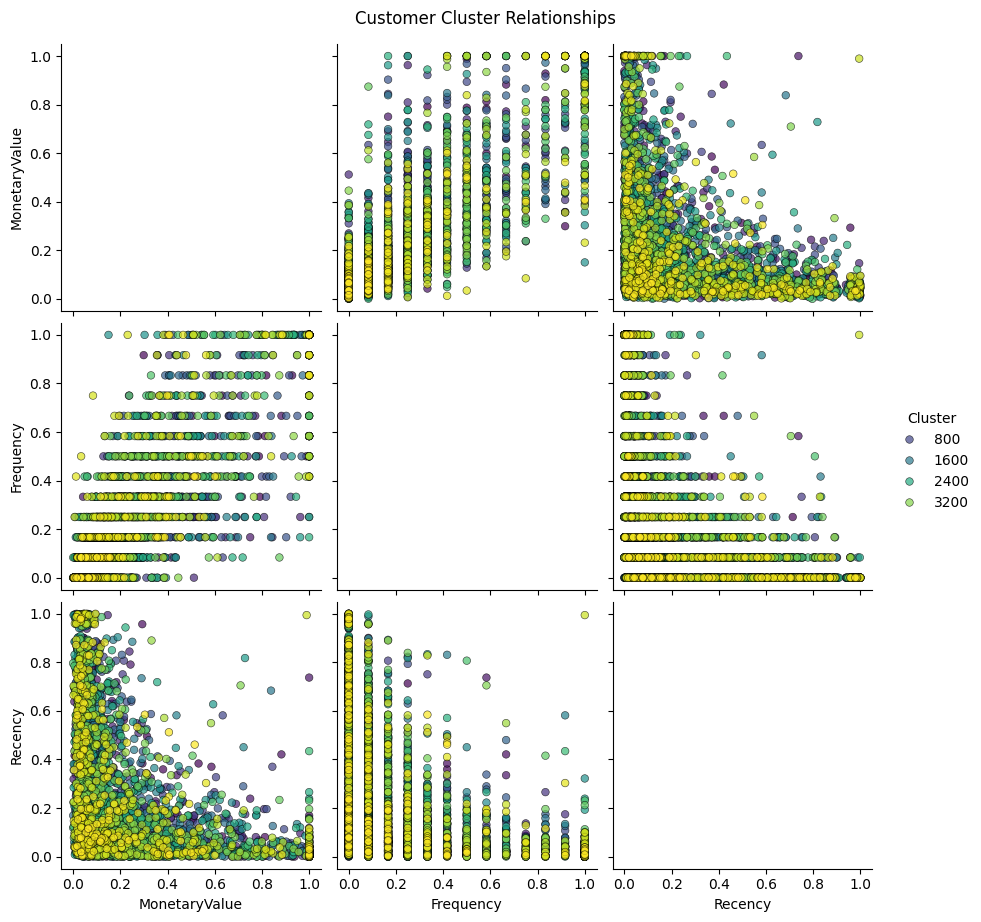

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select 3 most important features for clarity
features = ['MonetaryValue', 'Frequency', 'Recency']
sns.pairplot(customer_data,
             vars=features,
             hue='Cluster',
             palette='viridis',
             plot_kws={'s': 30, 'alpha': 0.7, 'edgecolor': 'k'},
             height=3)
plt.suptitle('Customer Cluster Relationships', y=1.02)
plt.show()

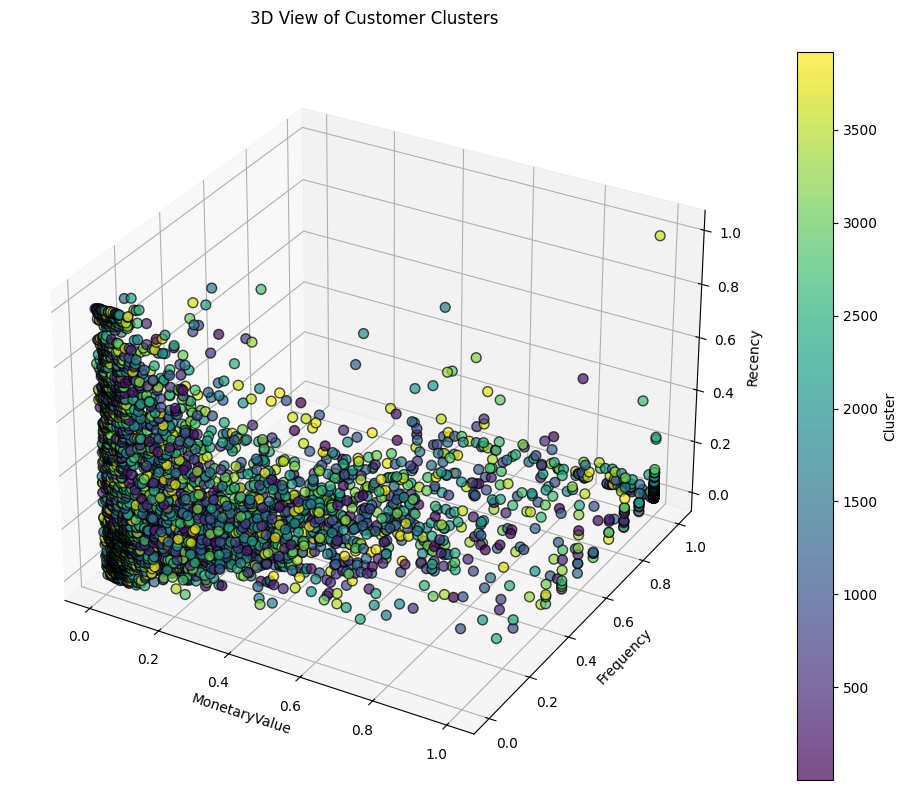

In [87]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(customer_data['MonetaryValue'],
                    customer_data['Frequency'],
                    customer_data['Recency'],
                    c=customer_data['Cluster'],
                    cmap='viridis',
                    s=50,
                    alpha=0.7,
                    edgecolor='k')

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('3D View of Customer Clusters', pad=20)
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.show()